<h2 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;">HIZLI BAKIŞ</h2>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#intro">0&nbsp;&nbsp;Veriye İlk Bakış</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#missing_value">I&nbsp;&nbsp;Eksik Değerlerin Doldurulması</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#Attribute">II&nbsp;&nbsp;Öznitelik Mühendisliği</a></h3>

---
<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#EDA">III&nbsp;&nbsp;Keşifci Veri Analizi</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#Fare">IV&nbsp;&nbsp;Bilet Fiyatı Analiz</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#embarked">V&nbsp;&nbsp;Biniş Limanı Analiz</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#family">VI&nbsp;&nbsp;Aile Durumu Analizi</a></h3>

---


<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#sex">VII&nbsp;&nbsp;Cinsiyet Dağılımı Analizi</a></h3>

---
<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#create">VIII&nbsp;&nbsp;Model Oluşturma</a></h3>

---
<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#predict">IX&nbsp;&nbsp;Tahmin ve Doğruluk</a></h3>

---
<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#predict">&nbsp;&nbsp;📚Kaynaklar📚</a></h3>


In [1]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font",size=14)
sns.set(style="white") #Seaborn Grafikleri İçin Arka Planı Beyaz Yapma
sns.set(style="whitegrid",color_codes=True)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore')
from pandas_profiling import ProfileReport
import missingno as msno

<h1 class="list-group-item list-group-item-action active" id="intro">Veriye İlk Bakış </h1>
![](https://miro.medium.com/max/9750/1*Q59ONUgBl159KgMJvghShA.jpeg)

###  **PassengerId** : Yolcu Numarası
###  **Survived** : Kaza Sonrasında Hayatta Kalanlar **1** ,Hayatta Kalmayanlar **0**
###  **Pclass** :Ekonomi Statüsüdür
####          - **1st** = Üst Sınıf
####          - **2nd** = Orta Sınıf
####          - **3rd** = Alt Sınıf
###  **Name** : Yolcuların İsimleri
###  **Sex** :  Kadın/Erkek
###  **Age** :  Yolcuların Yaşları
###  **SlipSp** : Yolcunun Beraber Seyahat Ettikleri Kişi Sayısı(Kardeşler+Eş)
###  **Parch** : Ebeveyn/Çocuk (1 or 0) 
####          - Eğer Çocuk Dadısıyla Seyahat Ediyorsa **Parch=**0 Olarak Değerlendirilir
###  **Ticket** : Bilet Numaraları
###  **Fare** : Bilet fiyatı
###  **Cabin** : Kabin numarası
###  **Embarked** : Liman isimleri (C, Q, S)
###  **C** = Cherbourg, **Q** = Queenstown, **S** = Southampton

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

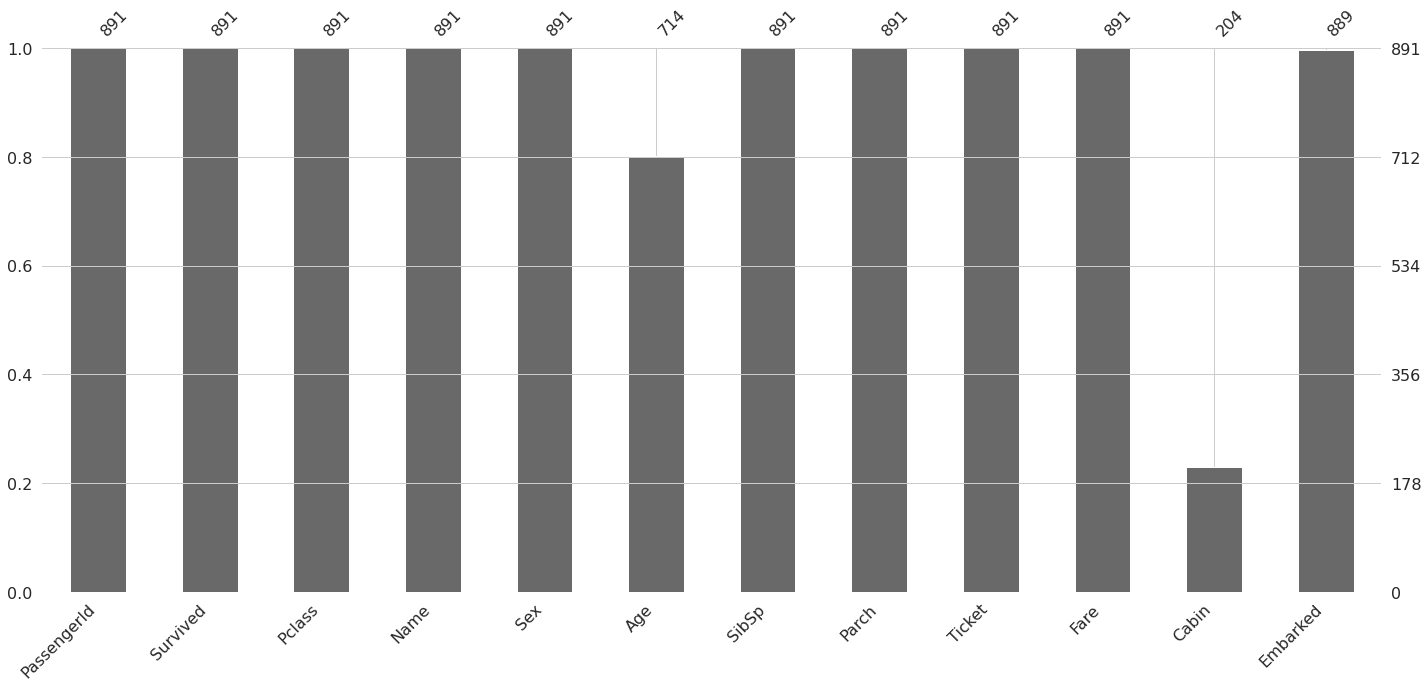

In [3]:
msno.bar(train);

In [4]:
print('Eğitim setinde ki gözlem sayısı: {}.'.format(train.shape[0]))
print('Test setinde ki gözlem sayısı: {}.'.format(test.shape[0]))

Eğitim setinde ki gözlem sayısı: 891.
Test setinde ki gözlem sayısı: 418.


<h1 class="list-group-item list-group-item-action active" id="missing_value">Eksik Değerlerin Doldurulması</h1>
<p style = "font-size : 19px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D4E6F1; border-radius: 25px 5px;"><strong>Açıkça görünüyor ki Age değişkeninde 177 eksik veri vardır. Bu eksik değerleri veri setinden çıkartırsak diğer değişkenlerden önemli bir veri kaybolur. Eğitim setinin %20'sini kapsayan eksik değerleri, doğal haline zarar vermeden halledelim çalışalım</strong></p>


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print('Eksik Age gözlemlerinin oranı:%2f%%'%((train['Age'].isnull().sum()/train.shape[0])*100))

Eksik Age gözlemlerinin oranı:19.865320%


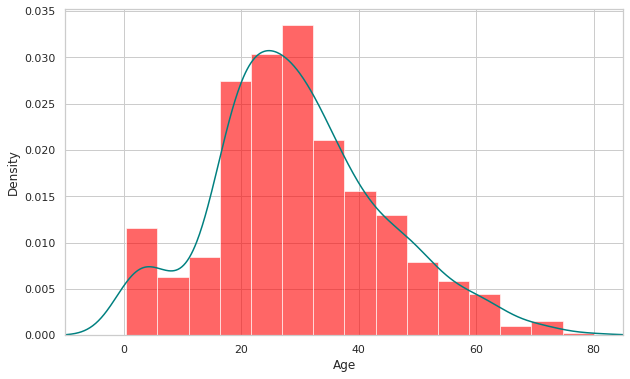

In [7]:
plt.figure(figsize=(10,6))
ax = train["Age"].hist(bins=15,density=True,stacked=True,color='red',alpha=0.6)
train["Age"].plot(kind='density',color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

<p style = "font-size : 21px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D4E6F1; border-radius: 20px 5px;"><strong>Age değişkeninin asimetrik dağılıma sahip(skewed) eğri olduğundan medyanını kullanmak daha yansız sonuçlar verecektir</strong></p>

In [8]:
print('Age sütunun ortalaması:%2f'%(train['Age'].mean(skipna=True)))
print('Age sütunun medyanı:%2f'%(train['Age'].median(skipna=True)))

Age sütunun ortalaması:29.699118
Age sütunun medyanı:28.000000


In [9]:
train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [10]:
print('Eksik Cabin gözlemlerinin oranı:%2f%%'%((train['Cabin'].isnull().sum()/train.shape[0])*100))

Eksik Cabin gözlemlerinin oranı:77.104377%


<p style = "font-size : 21px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D4E6F1; border-radius: 20px 5px;"><strong>%77'lik bir kayıp veriyi %33'lük dolu olan bir veri ile  doldurulması çok sağlıklı olmayacaktır</strong></p>

In [11]:
print('Eksik Embarked gözlemlerinin oranı:%2f%%'%((train['Embarked'].isnull().sum()/train.shape[0])*100))

Eksik Embarked gözlemlerinin oranı:0.224467%


<p style = "font-size : 30px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 25px 5px;"><strong>Biniş Limanı Dağılımı </strong></p>


S    644
C    168
Q     77
Name: Embarked, dtype: int64


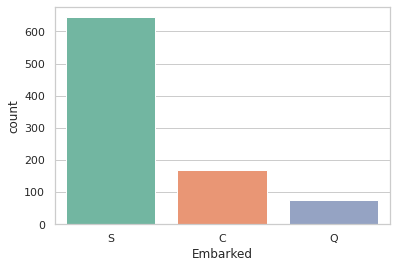

In [12]:
print(train['Embarked'].value_counts())
sns.countplot(x='Embarked',data=train,palette='Set2')
plt.show()

<p style = "font-size : 15px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D4E6F1; border-radius: 60px 30px;"><strong>Eğitim Setinin bir kopyasını alıp yukarıda belirlenen stratejilere göre eksik verileri dolduralım.Cabin değişkenini sağlıklı sonuç için çıkaralım</strong></p>

In [13]:
train_data = train.copy()
train_data["Age"].fillna(train["Age"].median(skipna=True),inplace=True)
train_data["Embarked"].fillna(train['Embarked'].value_counts().idxmax(),inplace=True)
train_data.drop('Cabin',axis=1,inplace=True)

In [14]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<p style = "font-size : 20px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D4E6F1; border-radius: 60px 30px;"><strong>Age değişkeninin orjinal ve düzenlenmesi sonrasını karşılaştıralım</strong></p>

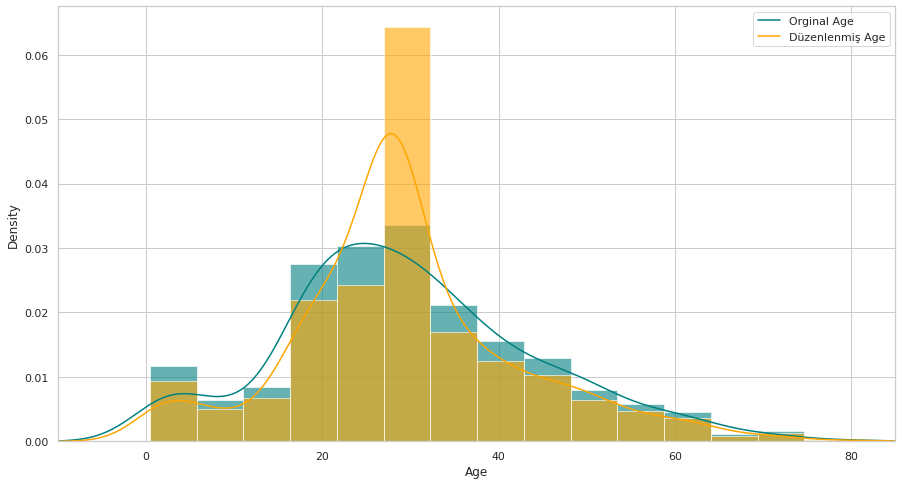

In [15]:
plt.figure(figsize=(15,8))

ax = train["Age"].hist(bins=15,density=True,stacked=True,color='teal',alpha=0.6)

train["Age"].plot(kind='density',color='teal')

ax = train_data["Age"].hist(bins=15,density=True,stacked=True,color='orange',alpha=0.6)
train_data['Age'].plot(kind='density',color='orange')
ax.legend(['Orginal Age','Düzenlenmiş Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

<h1 class="list-group-item list-group-item-action active" id="Attribute">Öznitelik Mühendisliği</h1>
<p style = "font-size : 19px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D4E6F1; border-radius: 25px 5px;"><strong>Veri setinde SibSp(kardeş/eşi),Parch(ebeveyn/çocuk) şeklinde aile ilgili bağlantılar bulunuyor bu bağlantıların daha ayırt edilebilir hale gelmesi için yanlız ve aile ile seyahat eden adında değişkenlere ihtiyaç duyarız</strong></p>
​

In [16]:
train_data['TravelAlone']=np.where(
(train_data['SibSp']+train_data['Parch'])>0,0,1)
train_data.drop('SibSp',axis=1,inplace=True)
train_data.drop('Parch',axis=1,inplace=True)

<p style = "font-size : 19px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D4E6F1; border-radius: 25px 5px;"><strong>Pclass,Sex,Embarked kategorik değişkenlerdir.Bu değişkenlerin tek sutünde yer almasını sağlamak için dönüşüm yapıyoruz</strong></p>

In [17]:
training=pd.get_dummies(train_data,columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female',axis=1,inplace=True)
training.drop('PassengerId',axis=1,inplace=True)
training.drop('Name',axis=1,inplace=True)
training.drop('Ticket',axis=1,inplace=True)

In [18]:
final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


<p style = "font-size : 20px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D4E6F1; border-radius: 60px 30px;"><strong>Yukarıda yaptığımız işlemleri test veri setimiz için de uyguluyoruz</strong></p>

In [19]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
test_data = test.copy()
test_data["Age"].fillna(train["Age"].median(skipna=True),inplace=True)
test_data["Fare"].fillna(train['Fare'].value_counts().idxmax(),inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

In [21]:
test_data['TravelAlone']=np.where(
(test_data['SibSp']+test_data['Parch'])>0,0,1)

test_data.drop('SibSp',axis=1,inplace=True)
test_data.drop('Parch',axis=1,inplace=True)

In [22]:
testing=pd.get_dummies(test_data,columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female',axis=1,inplace=True)
testing.drop('PassengerId',axis=1,inplace=True)
testing.drop('Name',axis=1,inplace=True)
testing.drop('Ticket',axis=1,inplace=True)

In [23]:
final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


<h1 class="list-group-item list-group-item-action active" id="EDA">&nbsp;Keşifci Veri Analizi</h1>

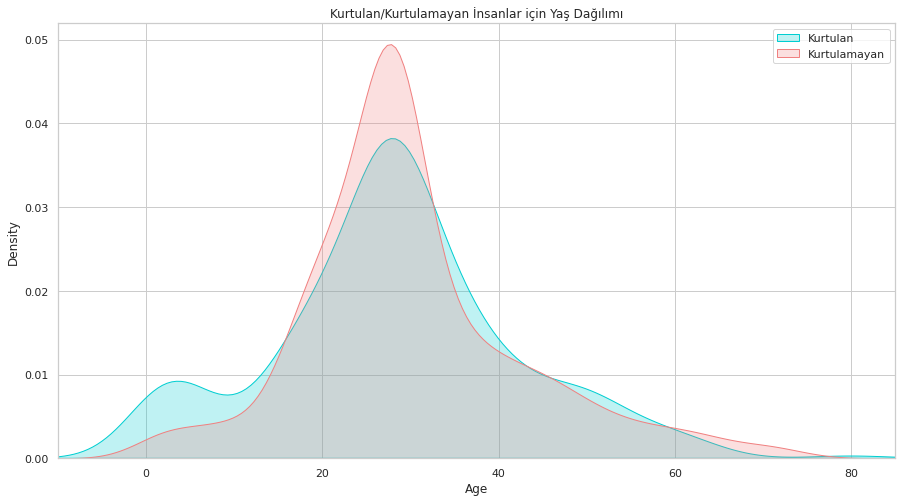

In [24]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived==1],
                color="darkturquoise",shade=True)
ax = sns.kdeplot(final_train["Age"][final_train.Survived==0],
                color="lightcoral",shade=True)
plt.legend(['Kurtulan','Kurtulamayan'])
plt.title('Kurtulan/Kurtulamayan İnsanlar için Yaş Dağılımı')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

<p style = "font-size : 25px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 25px 5px;"><strong>Kurtulanların Yaş Dağılımı</strong></p>

<p style = "font-size : 18px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D4E6F1; border-radius: 60px 30px;"><strong>Kurtulanların dikkat çeken farklılığı çoçuklardır (15 yaş altı).Muhtemelen ebeveynler onların kurtulması için can yeleklerini onlara vermişler </strong></p>

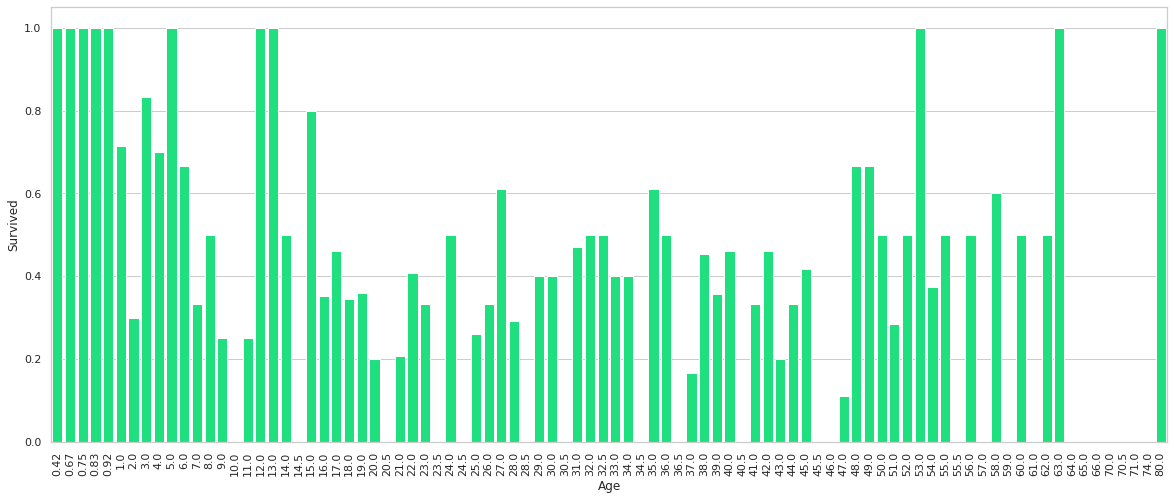

In [25]:
plt.figure(figsize=(20,8))
avg_alive = final_train[["Age","Survived"]].groupby(['Age'],
                                                   as_index=False).mean()
g = sns.barplot(x='Age',y='Survived',data=avg_alive,color='springgreen')
plt.xticks(rotation=90)
plt.show()

<p style = "font-size : 18px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D4E6F1; border-radius: 60px 30px;"><strong>15 yaşının altında ki kişilerin kritik olmasından dolayı çoçuklar(IsMinor) adında bir değişken daha oluşturuyoruz</strong></p>

In [26]:
final_train['IsMinor']=np.where(final_train['Age']<=16,1,0)
final_test['IsMinor']=np.where(final_test['Age']<=16,1,0)

<p style = "font-size : 18px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D4E6F1; border-radius: 60px 30px;"><strong>Kurtulanların ve kurtulamayanların arasında ki en önemli farklılıklardan  biri de bilet(Fare) tarifesidir.Yüksek tarifeli yolcuların diğer yolculara kıyasla kurtulma oranı daha çok olduğu görülmektedir</strong></p>

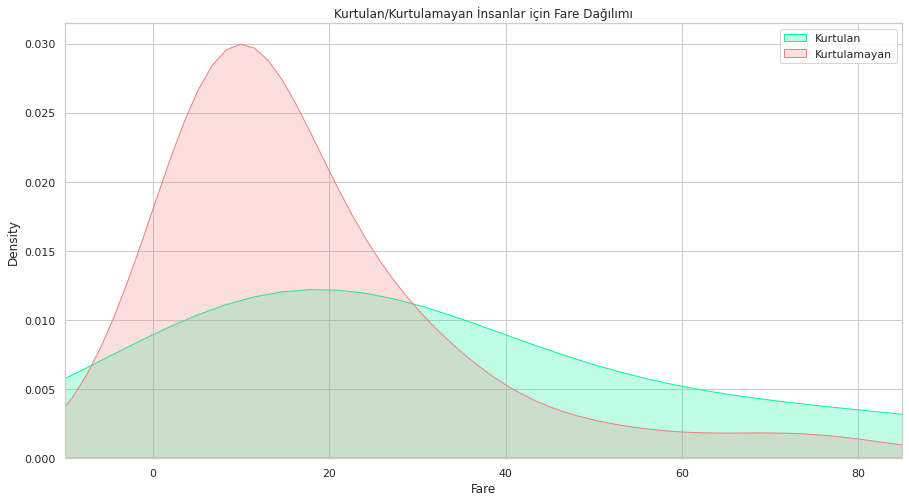

In [27]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train['Fare'][final_train.Survived==1],
                color="mediumspringgreen",shade=True)
ax = sns.kdeplot(final_train['Fare'][final_train.Survived==0],
                color="lightcoral",shade=True)
plt.legend(['Kurtulan','Kurtulamayan'])
plt.title('Kurtulan/Kurtulamayan İnsanlar için Fare Dağılımı')
ax.set(xlabel='Fare')
plt.xlim(-10,85)
plt.show()

<h1 class="list-group-item list-group-item-action active" id="Fare">Bilet Fiyatı Analiz</h1>

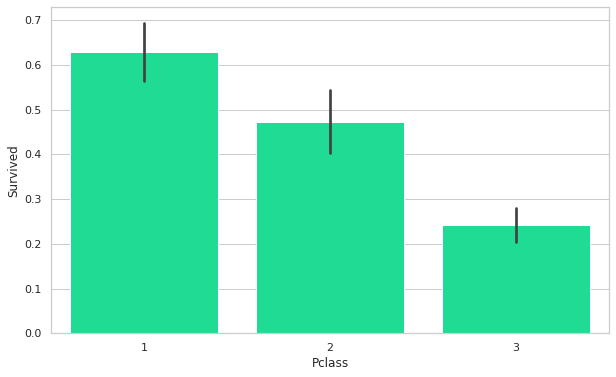

In [28]:
plt.figure(figsize=(10,6))
sns.barplot('Pclass','Survived',data=train,color="mediumspringgreen");

<p style = "font-size : 21px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D4E6F1; border-radius: 60px 30px;"><strong>Tahmin Edildiği gibi 1. Sınıf yolcuların kurtulma şansı yüksek</strong></p>

<h1 class="list-group-item list-group-item-action active" id="embarked">Biniş Limanı Analiz Analiz</h1>

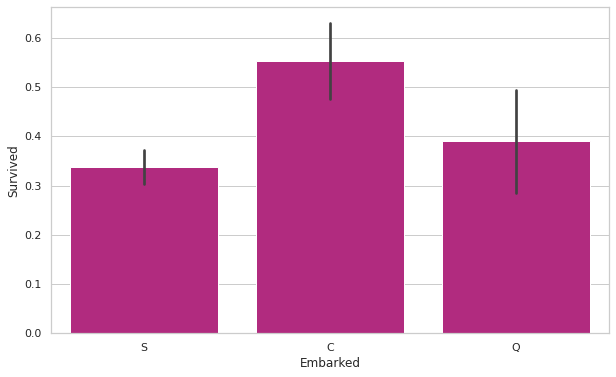

In [29]:
plt.figure(figsize=(10,6))
sns.barplot('Embarked','Survived',data=train,color="mediumvioletred");

<strong><ul style="list-style-type:square">
 <li>Cherbourg, Fransa'dan binen yolcular yüksek kurtulma oranına sahiptirler ☘️ ☘️ ☘️</li>
 <li>Southampton'dan binen yolcular daha az kurtulma şansı ☘️ ☘️ </li>
 <li>Queenstown'dan binen yolcular ise Southampton'dan az bir fark ile daha az kurtulma şansı ☘️</li>
</ul></strong>

<h1 class="list-group-item list-group-item-action active" id="family">Aile Durumu Analizi</h1>

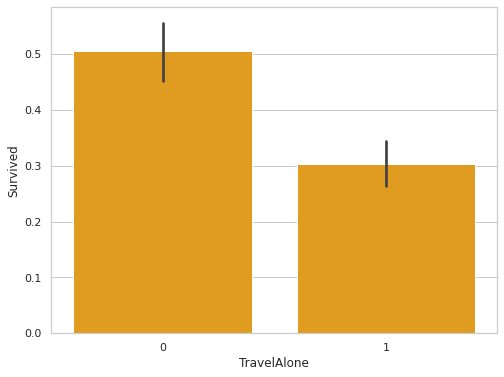

In [30]:
plt.figure(figsize=(8,6))
sns.barplot('TravelAlone','Survived',data=final_train,color="orange");


<h1 class="list-group-item list-group-item-action active" id="sex">Cinsiyet Dağılımı Analizi</h1>

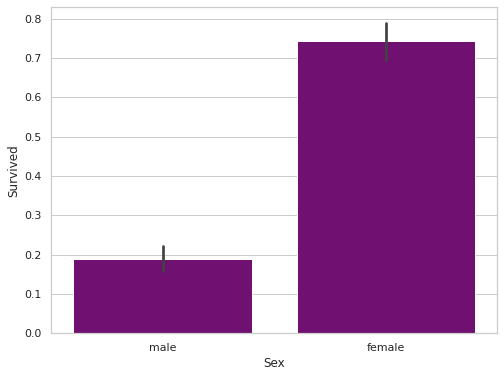

In [31]:
plt.figure(figsize=(8,6))
sns.barplot('Sex','Survived',data=train,color='purple');

<h1 class="list-group-item list-group-item-action active" id="create">Model Oluşturma</h1>

In [32]:
final_train.columns

Index(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male',
       'IsMinor'],
      dtype='object')

In [33]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
X = final_train[cols]
y = final_train["Survived"]

<p style = "font-size : 21px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #D4E6F1; border-radius: 60px 30px;"><strong>RFE Yöntemine göre seçeceğimiz değişkenlerden bir liste oluşturduk.Seçilen değişkenlere bakıldığında bazılarının alınmadığı görülmektedir.Bunun nedeni ise:</strong></p>

<strong><ul style="list-style-type:square">
 <li>Pclass_3 zaten Pclass1,Pclass2 olmayanları içerdiği için bir değişkende anlaşılmaktadır</li>
 <li>Kadın yolcular için ayrı bir değişken eklemedik çünkü:erkek yolcu ile kadın yolcu arasında negatif ve tam korelasyona sahiptir</li>
</ul></strong>

In [34]:
model = LogisticRegression(solver='liblinear') # Decode Hatasını Liblinear ile Çözüldü
rfe = RFE(model,10)
rfe = rfe.fit(X,y)

In [35]:
print('Seçilen Öznitelikler: %s' %list(X.columns[rfe.support_]))

Seçilen Öznitelikler: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


In [36]:
rfecv = RFECV(estimator=model,step=1,cv=10,scoring ='accuracy')
rfecv.fit(X,y)
print('Optimum Öznitelik Sayısı: %d' %rfecv.n_features_)
print('Belirlenen Öznitelik Sayısı: %s'%list(X.columns[rfe.support_]))

Optimum Öznitelik Sayısı: 8
Belirlenen Öznitelik Sayısı: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


<p style = "font-size : 30px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 25px 5px;"><strong>Çapraz Doğrulamaya Göre Seçilen Öznitelik Sayısı</strong></p>

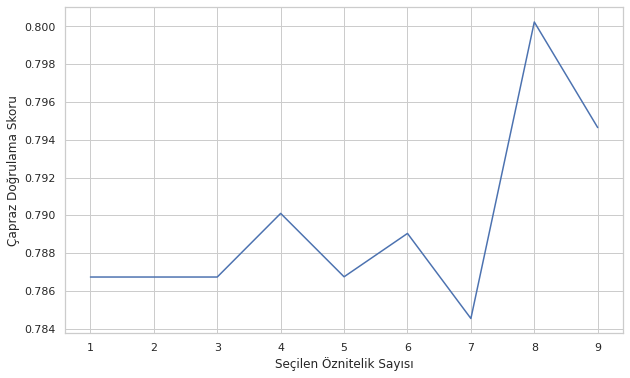

In [37]:
plt.figure(figsize=(10,6))
plt.xlabel("Seçilen Öznitelik Sayısı")
plt.ylabel("Çapraz Doğrulama Skoru")
plt.plot(range(1, len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

<p style = "font-size : 15px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 25px 5px;"><strong>RFECV Modulü değişken belirleme için çapraz doğrulamaya imkan verir.Seçilem değişkenler Lojistik Regresyon için kullanılır.Seçilen 8 değişkenle modelleme yapıldığında en yüksek skora ulaşıyoruz</strong></p>

# <p style = "font-size : 30px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 25px 5px;"><strong>Korelasyon Matrix</strong></p>

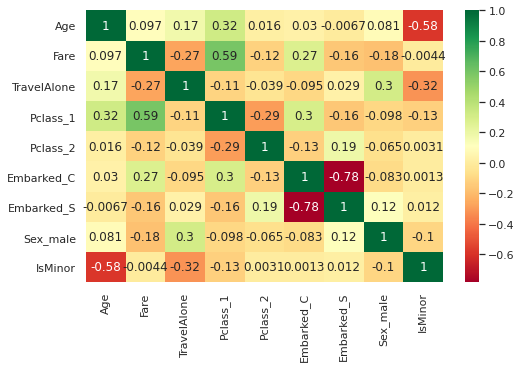

In [38]:
selected = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
X = final_train[selected]
plt.subplots(figsize=(8,5))
sns.heatmap(X.corr(),annot=True,cmap="RdYlGn");

# Model Tuned

In [39]:
X = final_train[selected]
y = final_train["Survived"]
parametre = {'C':np.arange(1e-05,3,0.1),
            "penalty":["l1","l2"]}
scoring = {'Accuracy':'accuracy'}
tuned = GridSearchCV(model,return_train_score=True,param_grid=parametre,scoring=scoring,cv=10,refit='Accuracy')
tuned.fit(X,y)
results = tuned.cv_results_

In [40]:
print("Best_Parametre:"+str(tuned.best_estimator_))
print("CV with Best_Parametre:"+str(tuned.best_params_))
print("Accuracy:",tuned.best_score_)

Best_Parametre:LogisticRegression(C=2.3000100000000003, penalty='l1', solver='liblinear')
CV with Best_Parametre:{'C': 2.3000100000000003, 'penalty': 'l1'}
Accuracy: 0.8002496878901374


<h1 class="list-group-item list-group-item-action active" id="predict">Tahmin ve Doğruluk</h1>

In [41]:
final_test['Survived'] = tuned.best_estimator_.predict(final_test[selected])
final_test['PassengerId'] = test['PassengerId']
output = final_test[['PassengerId','Survived']]
output.to_csv('titanic_submission.csv', index=False)
print("Submission file was successfully saved!")

Submission file was successfully saved!


In [42]:
survived = pd.read_csv('../input/titanic/gender_submission.csv')

In [43]:
#Accuracy/Doğruluk Skoru
from sklearn.metrics import accuracy_score
print('Doğruluk (Accuracy) Skoru :%0.2f'%accuracy_score(survived['Survived'],output['Survived']))

Doğruluk (Accuracy) Skoru :0.94


<p style = "font-size : 19px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 25px 5px;"><strong>Buraya Kadar Geldiysen Veri Bilimine Olan İlgin Bir Harika ✨😍
    Oy vermeyi Unutma👋👋</strong></p>

<h1 class="list-group-item list-group-item-action active" id="missing_value">📚Yararlanılan Kaynaklar📚</h1>

1. <a href="http://https://jakevdp.github.io/PythonDataScienceHandbook/">HandBook</a>
2. <a href="https://github.com/jakevdp/PythonDataScienceHandbook">HandBook Github</a>
3. <a href="https://en.wikipedia.org/wiki/Titanic">Wikipedia</a>
4.  = Sorhun, E.(2021).Python İle Makine Öğrenmesi,İstanbul: Abaküs
> <a href="https://www.abakuskitap.com/urun/python-ile-makine-ogrenmesi">Python İle Makine Öğrenmesi</a>

